In [2]:
import pandas as pd

In [3]:
acp = pd.read_csv('accepted_2007_to_2018Q4.csv.gz', compression='gzip', low_memory=True)

C:\Users\tnivo\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [158]:
cols = list(acp.columns)

In [159]:
cols

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [160]:
acp[['issuance_date','last_pymnt_date']].head()

,issuance_date,last_pymnt_date
0,2015-12-01,2019-01-01
1,2015-12-01,2016-06-01
2,2015-12-01,2017-06-01
3,2015-12-01,2019-02-01
4,2015-12-01,2016-07-01


In [4]:
import numpy as np

In [171]:
acp['months_to_last'] = (acp['last_pymnt_date'] - acp['issuance_date'])/np.timedelta64(1, 'M')

In [183]:
acp[['sub_grade','issuance_date','last_pymnt_date','months_to_last']].head()

,sub_grade,issuance_date,last_pymnt_date,months_to_last
0,C4,2015-12-01,2019-01-01,37.027454
1,C1,2015-12-01,2016-06-01,6.012444
2,B4,2015-12-01,2017-06-01,18.004476
3,C5,2015-12-01,2019-02-01,38.045956
4,F1,2015-12-01,2016-07-01,6.998090


In [172]:
acpMonthto = acp[(acp['loan_status']=='Fully Paid') | (acp['loan_status']=='Charged Off')]

In [173]:
acpAvgMo = acpMonthto.groupby('sub_grade').mean()['months_to_last'].reset_index()

[Text(0, 0, '0'),
 Text(0, 0, '5'),
 Text(0, 0, '10'),
 Text(0, 0, '15'),
 Text(0, 0, '20'),
 Text(0, 0, '25')]

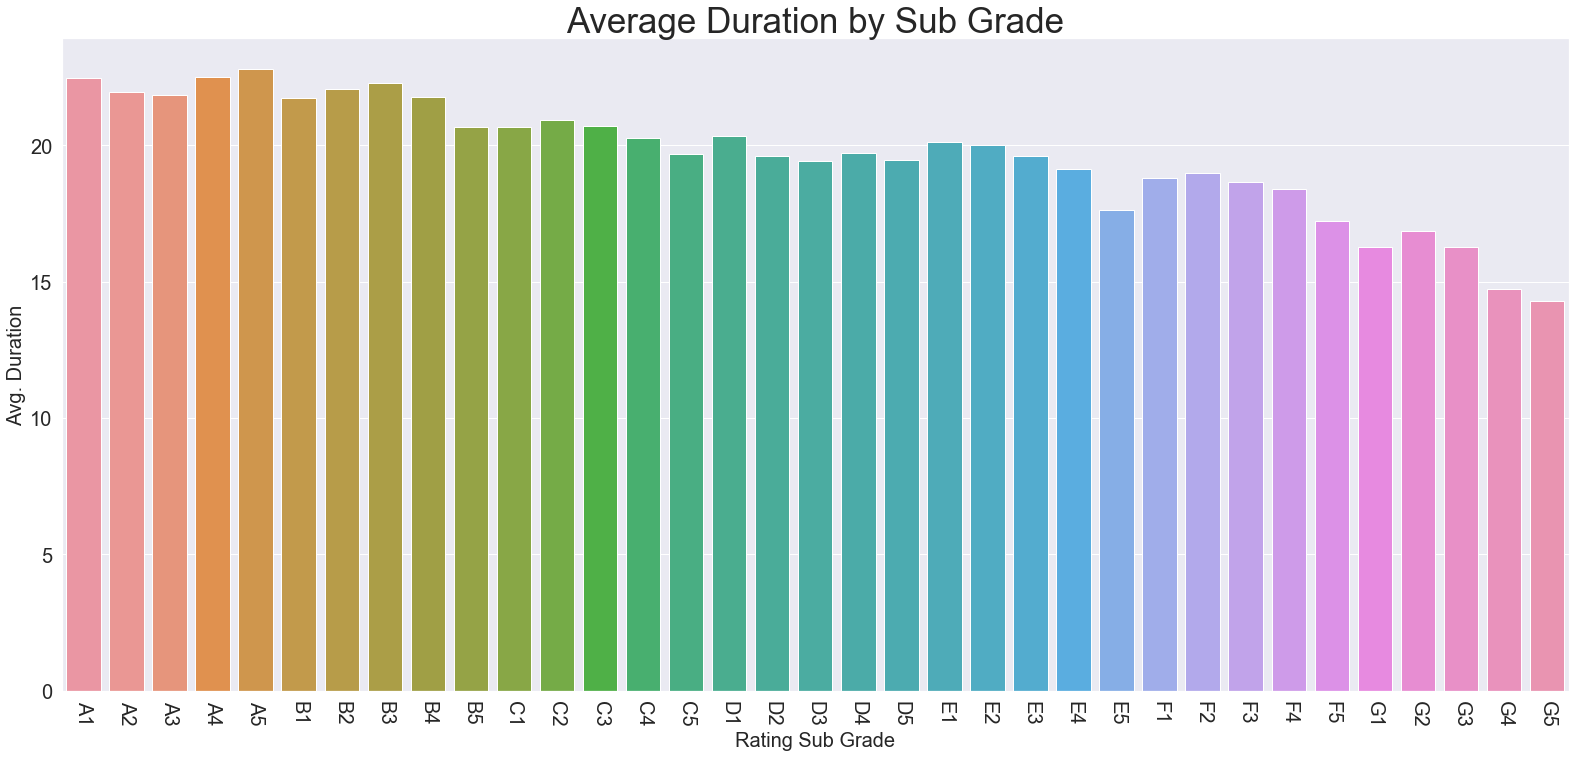

In [176]:
sns.set(style = 'darkgrid')
ax = sns.barplot(x='sub_grade', y = 'months_to_last', data = acpAvgMo)
ax.set_xticklabels(ax.get_xticklabels(),rotation=270)
ylabels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.axes.set_title('Average Duration by Sub Grade',fontsize=35)
ax.set_xlabel('Rating Sub Grade',fontsize=20)
ax.set_ylabel('Avg. Duration',fontsize=20)
#ax.set(xlabel='Rating Sub Grade', ylabel = 'Total # of Loans', fontsize = 20)
ax.set_yticklabels(ylabels)
ax.tick_params(labelsize=20)
#ax.set(xlabel='Rating Sub Grade', ylabel = 'Avg Term (Months)')
ax.set_yticklabels(ylabels)

In [152]:
acp['last_pymnt_date'] = pd.to_datetime(acp['last_pymnt_d'])

In [157]:
acp['issuance_date'] = pd.to_datetime(acp['issue_d'])

In [107]:
acp['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [5]:
def chStatus(x):
    if x == 'Charged Off':
        x = 1
    else:
        x = 0
    return x

In [19]:
def loanBucket(x):
    if x > 35000.0:
        bucket = "Greater 35k"
    elif x > 30000.0:
        bucket = "Between 30k to 35k"
    elif x > 25000.0:
        bucket = "Between 25k to 30k"
    elif x > 20000.0:
        bucket = "Between 20k to 25k"
    elif x > 15000.0:
        bucket = "Between 15k to 20k"
    elif x > 10000.0:
        bucket = "Between 10k to 15k"   
    else:
        bucket = "Less than 10k"
    return bucket

In [20]:
acp['loan_bucket'] = acp['loan_amnt'].apply(loanBucket)

In [213]:
acp.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,year_issue,last_pymnt_date,issuance_date,months_to_last,loan_bucket
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,NaN,NaN,NaN,2015.0,2019-01-01,2015-12-01,37.027454,Less than 10k
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,NaN,NaN,NaN,2015.0,2016-06-01,2015-12-01,6.012444,Between 20k to 30k
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,NaN,NaN,NaN,2015.0,2017-06-01,2015-12-01,18.004476,Between 10k to 20k
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,NaN,NaN,NaN,2015.0,2019-02-01,2015-12-01,38.045956,Between 30k to 40k
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,NaN,NaN,NaN,2015.0,2016-07-01,2015-12-01,6.998090,Between 10k to 20k


In [21]:
acpLBSub = acp[(acp['loan_status']=='Fully Paid') | (acp['loan_status']=='Charged Off')].copy()

In [22]:
acpLBSub['loan_status_new'] = acpLBSub['loan_status'].apply(chStatus)

In [23]:
acpLBSubDR = acpLBSub.groupby(['loan_bucket']).agg({'loan_status':'count','loan_status_new':'sum'}).reset_index()

In [24]:
acpLBSubDR['default_rate'] = acpLBSubDR['loan_status_new']/acpLBSubDR['loan_status']*100

In [27]:
acpLBSubDR.head()

,loan_bucket,loan_status,loan_status_new,default_rate
0,Between 10k to 15k,283773,58930,20.766599
1,Between 15k to 20k,214131,48459,22.630539
2,Between 20k to 25k,133047,30322,22.790442
3,Between 25k to 30k,77437,17955,23.186590
4,Between 30k to 35k,72118,18051,25.029812


In [16]:
import seaborn as sns

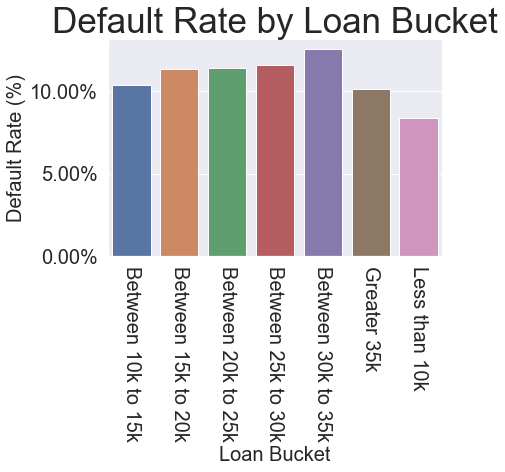

In [28]:
plotGraph('bar','loan_bucket','default_rate',acpLBSubDR,'Loan Bucket','Default Rate (%)','Default Rate by Loan Bucket','Pct') 

In [110]:
acpSub = acp[(acp['loan_status']=='Fully Paid') | (acp['loan_status']=='Charged Off')]

In [135]:
acpChargedOff = acp[acp['loan_status']=='Charged Off'].copy() 

In [142]:
acpReCRate = acpChargedOff.groupby('sub_grade').mean()['settlement_percentage'].reset_index()

In [147]:
acpRecTerm = acpChargedOff.groupby('sub_grade').mean()['settlement_term'].reset_index()

In [34]:
acp['settlement_percentage'].max()

521.35

In [177]:
acpRecTerm.head()

,sub_grade,settlement_term
0,A1,12.510549
1,A2,10.721088
2,A3,11.420712
3,A4,11.125954
4,A5,11.844612


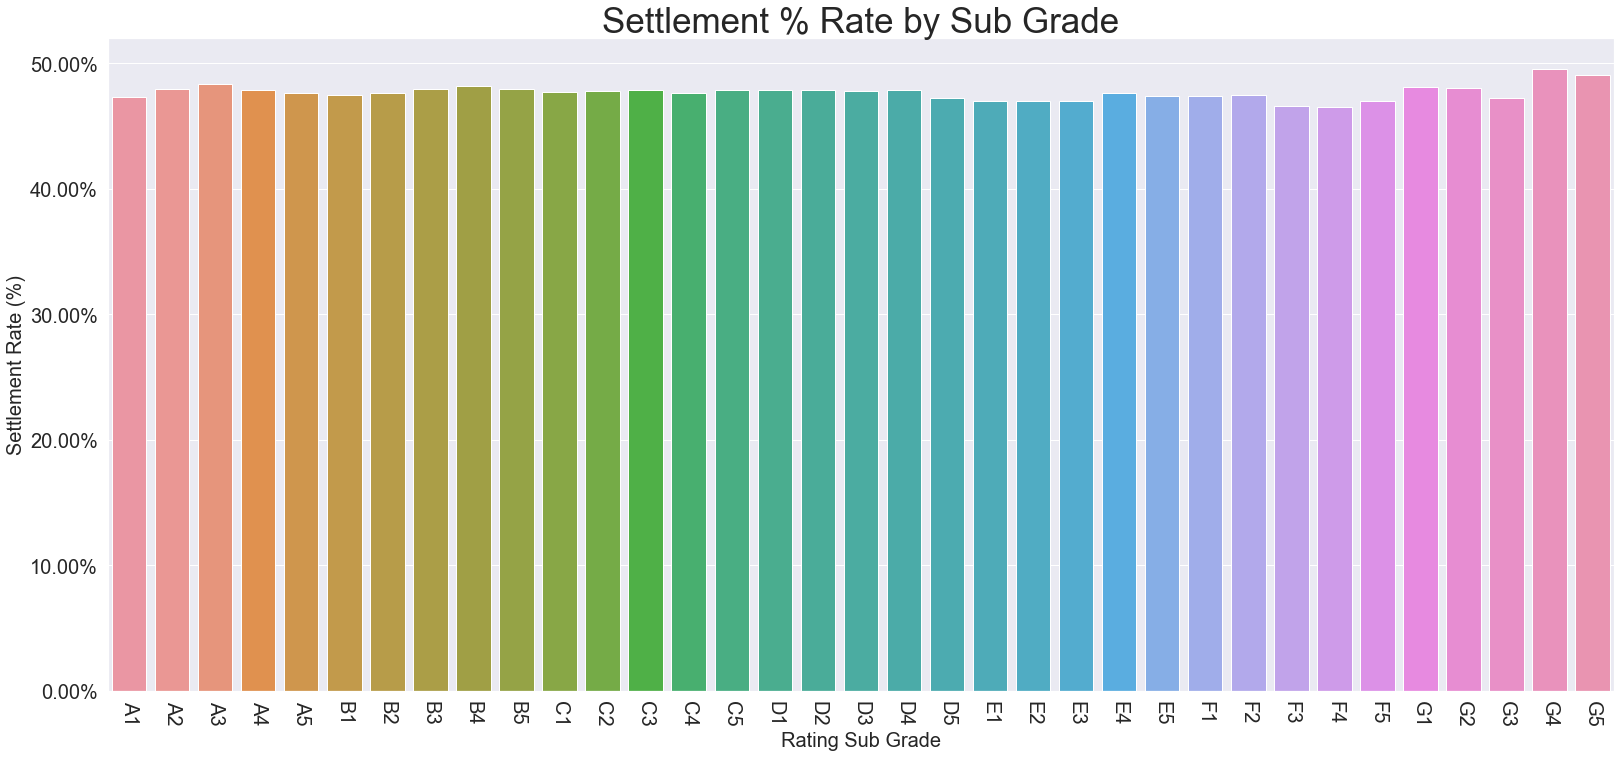

In [146]:
plotGraph('bar','sub_grade','settlement_percentage',acpReCRate,'Rating Sub Grade','Settlement Rate (%)','Settlement % Rate by Sub Grade','Pct') 

[Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '12'),
 Text(0, 0, '14'),
 Text(0, 0, '16'),
 Text(0, 0, '18')]

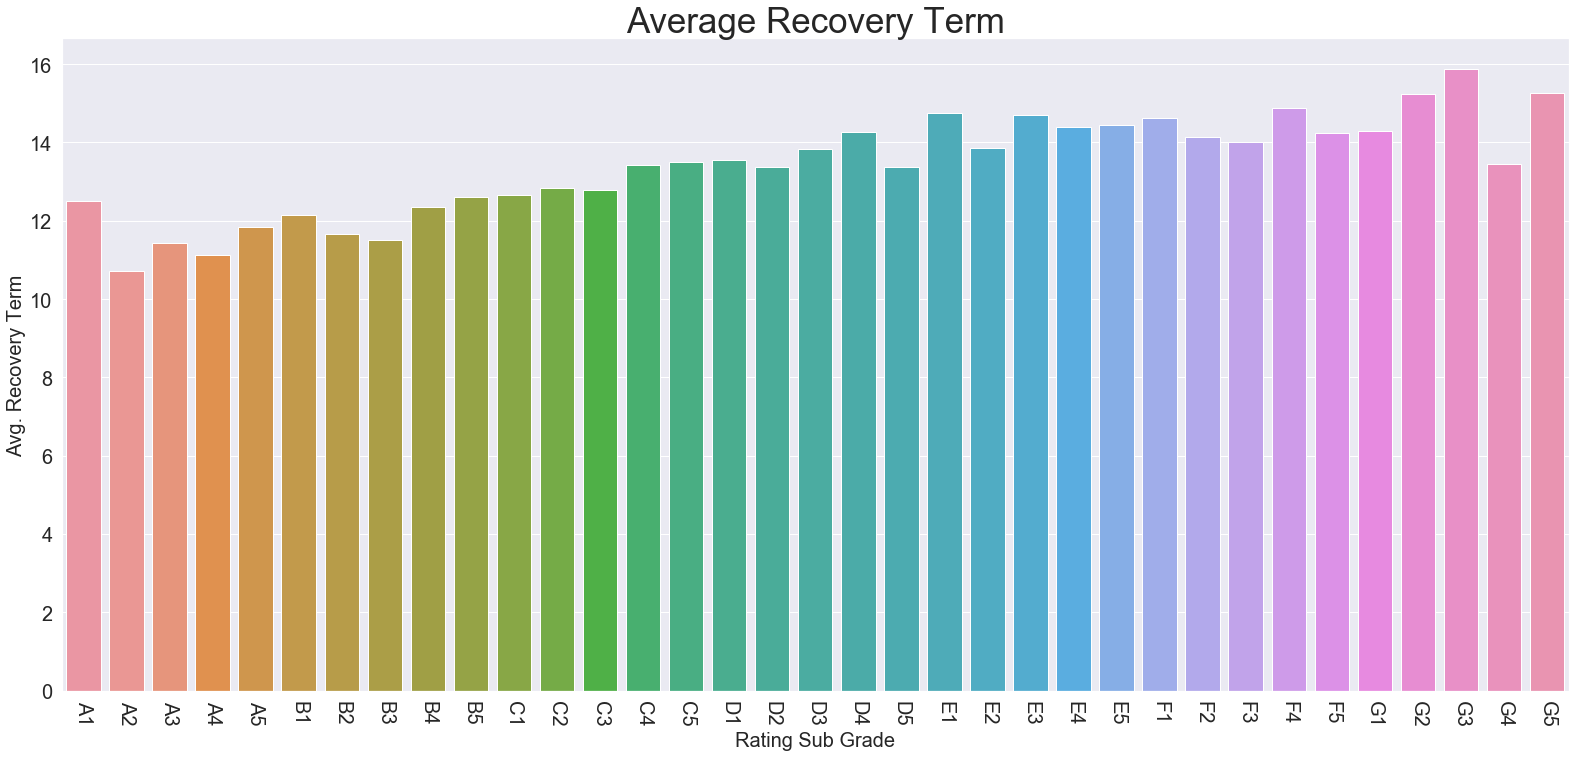

In [148]:
sns.set(style = 'darkgrid')
ax = sns.barplot(x='sub_grade', y = 'settlement_term', data = acpRecTerm)
ax.set_xticklabels(ax.get_xticklabels(),rotation=270)
ylabels = ['{:,.0f}'.format(x) for x in ax.get_yticks()]
ax.axes.set_title('Average Recovery Term',fontsize=35)
ax.set_xlabel('Rating Sub Grade',fontsize=20)
ax.set_ylabel('Avg. Recovery Term',fontsize=20)
#ax.set(xlabel='Rating Sub Grade', ylabel = 'Total # of Loans', fontsize = 20)
ax.set_yticklabels(ylabels)
ax.tick_params(labelsize=20)
#ax.set(xlabel='Rating Sub Grade', ylabel = 'Avg Term (Months)')
ax.set_yticklabels(ylabels)

In [114]:
acpSub['loan_status_new'] = acpSub['loan_status'].apply(chStatus)

C:\Users\tnivo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
acpSub[['loan_status','loan_status_new']].head()

,loan_status,loan_status_new
0,Fully Paid,0
1,Fully Paid,0
2,Fully Paid,0
4,Fully Paid,0
5,Fully Paid,0


In [119]:
acpDefaultRate = acpSub.groupby(['sub_grade']).agg({'loan_status':'count','loan_status_new':'sum'}).reset_index()

In [185]:
acpPurDR = acpSub.groupby(['purpose']).agg({'loan_status':'count','loan_status_new':'sum'}).reset_index()

In [124]:
acpDefaultRate['default_rate'] = acpDefaultRate['loan_status_new']/acpDefaultRate['loan_status']*100

In [186]:
acpPurDR['default_rate'] = acpPurDR['loan_status_new']/acpPurDR['loan_status']*100

In [ ]:
acp['settlement_rate']

In [189]:
acpPurDR

,purpose,loan_status,loan_status_new,default_rate
0,car,14585,2141,14.679465
1,credit_card,295279,49982,16.927042
2,debt_consolidation,780321,165014,21.146938
3,educational,326,56,17.177914
4,home_improvement,87504,15502,17.715762
5,house,7253,1587,21.880601
6,major_purchase,29425,5473,18.599830
7,medical,15554,3387,21.775749
8,moving,9480,2214,23.354430
9,other,77875,16385,21.040128


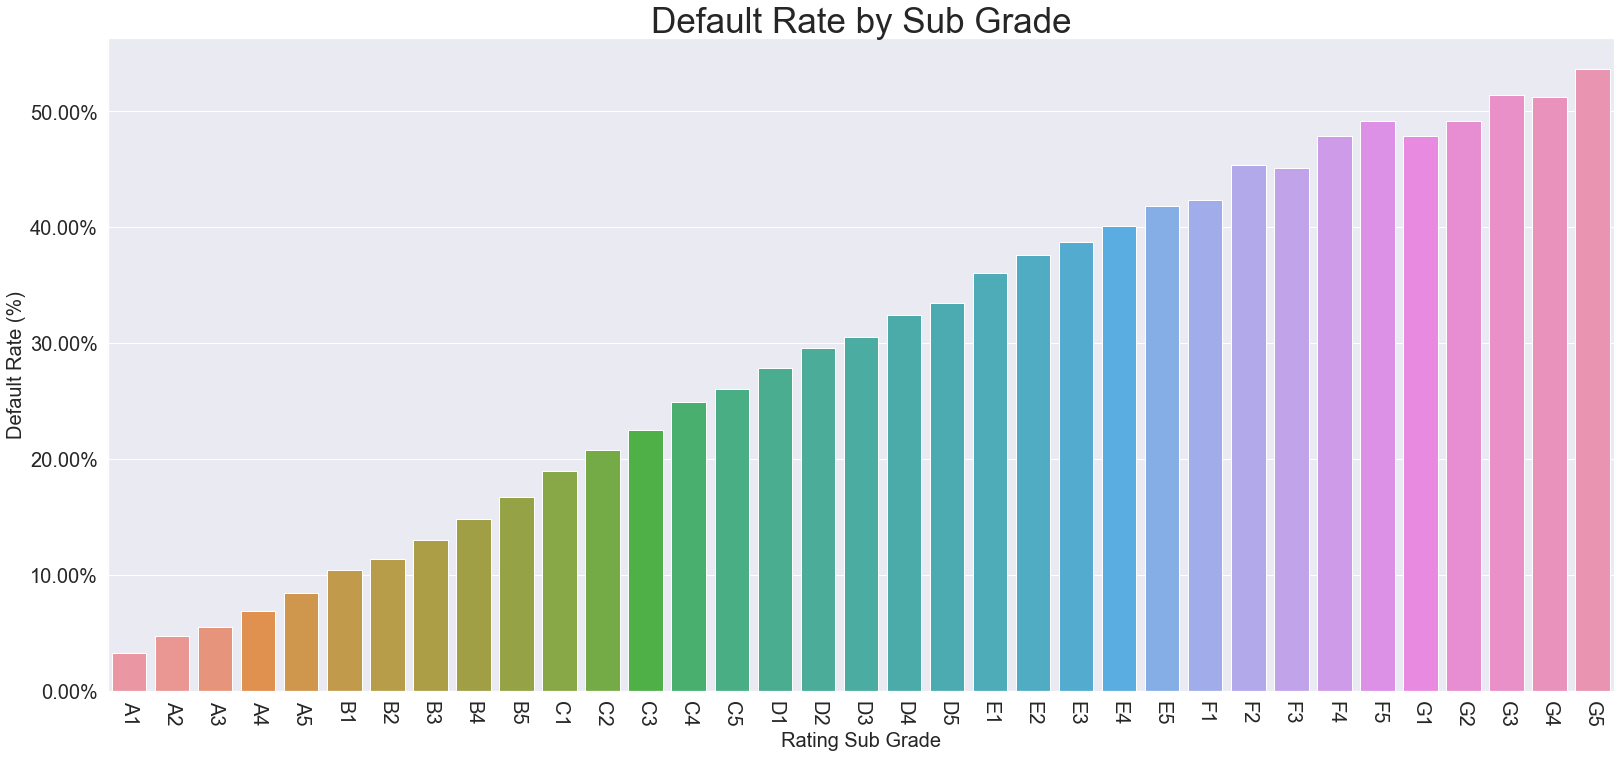

In [134]:
plotGraph('bar','sub_grade','default_rate',acpDefaultRate,'Rating Sub Grade','Default Rate (%)','Default Rate by Sub Grade','Pct') 

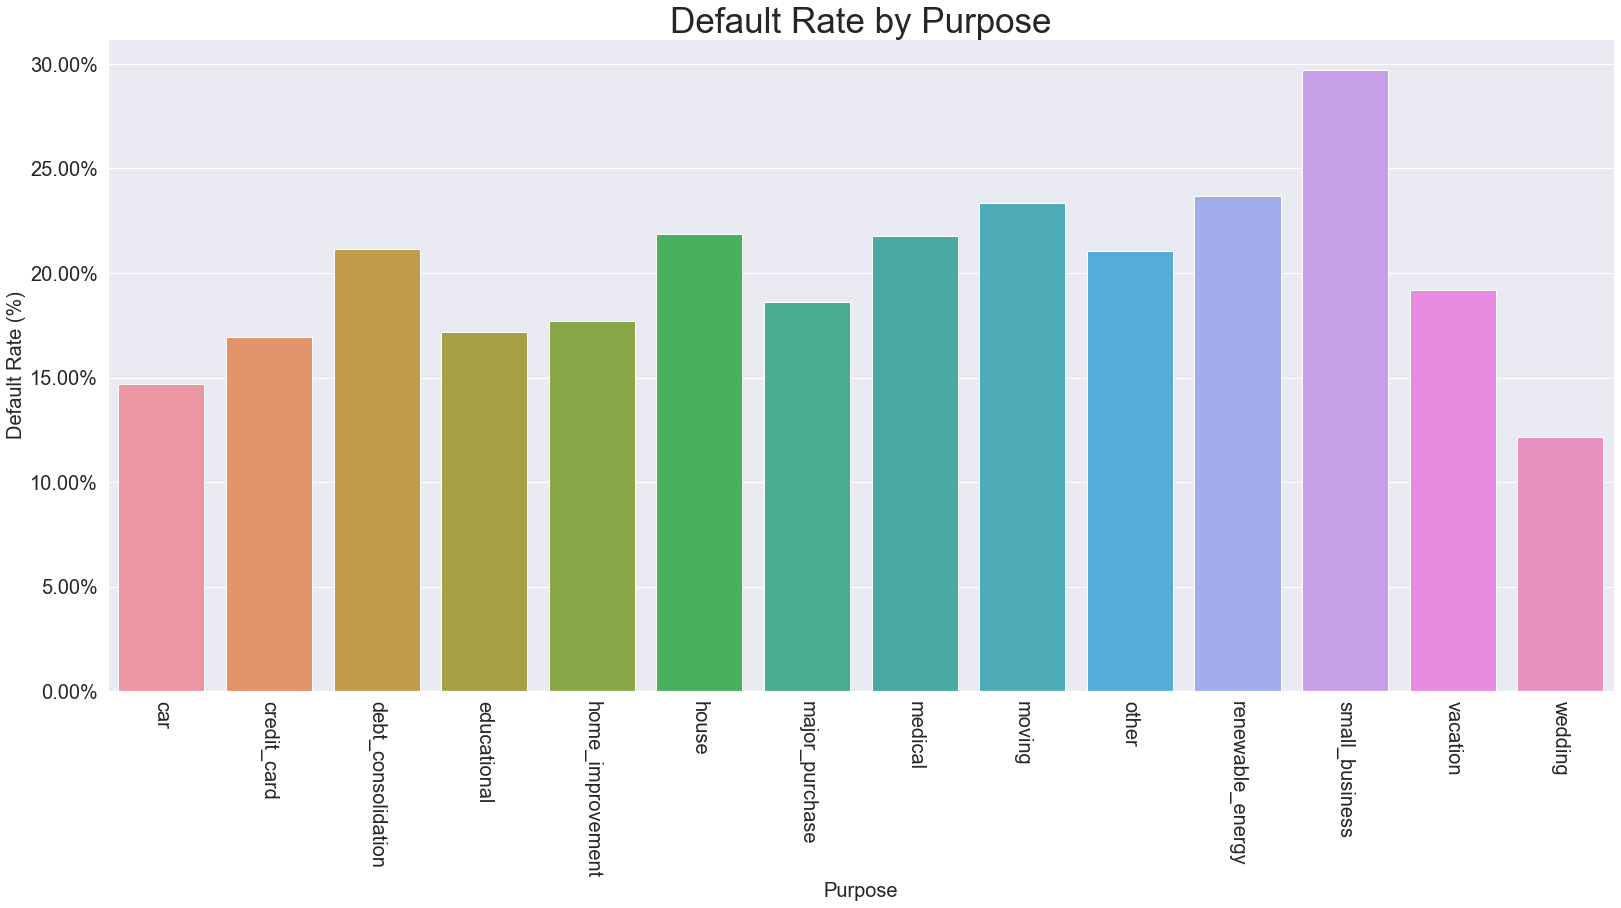

In [188]:
plotGraph('bar','purpose','default_rate',acpPurDR,'Purpose','Default Rate (%)','Default Rate by Purpose','Pct') 

In [128]:
acp['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', nan, 'NONE', 'OTHER'],
      dtype=object)

In [79]:
acp[['tot_hi_cred_lim','total_il_high_credit_limit','total_rev_hi_lim','mort_acc','home_ownership','revol_bal','all_util','total_bal_il','total_bal_ex_mort','tot_cur_bal']].head()

,tot_hi_cred_lim,total_il_high_credit_limit,total_rev_hi_lim,mort_acc,home_ownership,revol_bal,all_util,total_bal_il,total_bal_ex_mort,tot_cur_bal
0,178050.0,13734.0,9300.0,1.0,MORTGAGE,2765.0,34.0,4981.0,7746.0,144904.0
1,314017.0,24667.0,111800.0,4.0,MORTGAGE,21470.0,29.0,18005.0,39475.0,204396.0
2,218418.0,14877.0,14000.0,5.0,MORTGAGE,7869.0,65.0,10827.0,18696.0,189699.0
3,381215.0,18000.0,67300.0,1.0,MORTGAGE,7802.0,45.0,12609.0,52226.0,301500.0
4,439570.0,88097.0,34000.0,6.0,MORTGAGE,21929.0,78.0,73839.0,95768.0,331730.0


In [10]:
acp['issue_d'].unique()

array(['Dec-2015', 'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015',
       'Jul-2015', 'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015',
       'Feb-2015', 'Jan-2015', nan, 'Mar-2018', 'Feb-2018', 'Jan-2018',
       'Sep-2017', 'Aug-2017', 'Jul-2017', 'Jun-2016', 'May-2016',
       'Apr-2016', 'Sep-2018', 'Aug-2018', 'Jul-2018', 'Jun-2017',
       'May-2017', 'Apr-2017', 'Mar-2016', 'Feb-2016', 'Jan-2016',
       'Dec-2014', 'Nov-2014', 'Oct-2014', 'Sep-2014', 'Aug-2014',
       'Jul-2014', 'Jun-2014', 'May-2014', 'Apr-2014', 'Mar-2014',
       'Feb-2014', 'Jan-2014', 'Dec-2018', 'Nov-2018', 'Oct-2018',
       'Jun-2018', 'May-2018', 'Apr-2018', 'Dec-2011', 'Nov-2011',
       'Oct-2011', 'Sep-2011', 'Aug-2011', 'Jul-2011', 'Jun-2011',
       'May-2011', 'Apr-2011', 'Mar-2011', 'Feb-2011', 'Jan-2011',
       'Dec-2010', 'Nov-2010', 'Oct-2010', 'Sep-2010', 'Aug-2010',
       'Jul-2010', 'Jun-2010', 'May-2010', 'Apr-2010', 'Mar-2010',
       'Feb-2010', 'Jan-2010', 'Dec-2009', 'Nov-2009', 'O

In [29]:
acpByYear = acp.groupby(['issue_d']).count()[['loan_amnt']].reset_index()

In [30]:
acpByYear['year'] = acpByYear['issue_d'].str.extract('(\d+)').astype(float)

In [34]:
acp['year_issue'] = acp['issue_d'].str.extract('(\d+)').astype(float)

In [36]:
acp2012 = acp[acp['year_issue']==2012.0]

In [31]:
acpByYear.head()

,issue_d,loan_amnt,year
0,Apr-2008,259,2008.0
1,Apr-2009,333,2009.0
2,Apr-2010,912,2010.0
3,Apr-2011,1563,2011.0
4,Apr-2012,3230,2012.0


In [32]:
acp2012 = acpByYear[acpByYear['year']==2012.0]

In [33]:
acp2012

,issue_d,loan_amnt,year
4,Apr-2012,3230,2012.0
16,Aug-2012,5419,2012.0
28,Dec-2012,6066,2012.0
39,Feb-2012,2560,2012.0
50,Jan-2012,2602,2012.0
62,Jul-2012,4627,2012.0
74,Jun-2012,3817,2012.0
85,Mar-2012,2914,2012.0
96,May-2012,3400,2012.0
108,Nov-2012,6382,2012.0


In [50]:
import seaborn as sns

In [55]:
acpByYear['issuance_date'] = pd.to_datetime(acpByYear['issue_d'])

In [56]:
acpByYear['issuance_date'].head()

0   2008-04-01
1   2009-04-01
2   2010-04-01
3   2011-04-01
4   2012-04-01
Name: issuance_date, dtype: datetime64[ns]

In [51]:
acpByYear.head()

,issue_d,loan_amnt,year
0,Apr-2008,259,2008.0
1,Apr-2009,333,2009.0
2,Apr-2010,912,2010.0
3,Apr-2011,1563,2011.0
4,Apr-2012,3230,2012.0


In [58]:
from pandas.plotting import register_matplotlib_converters

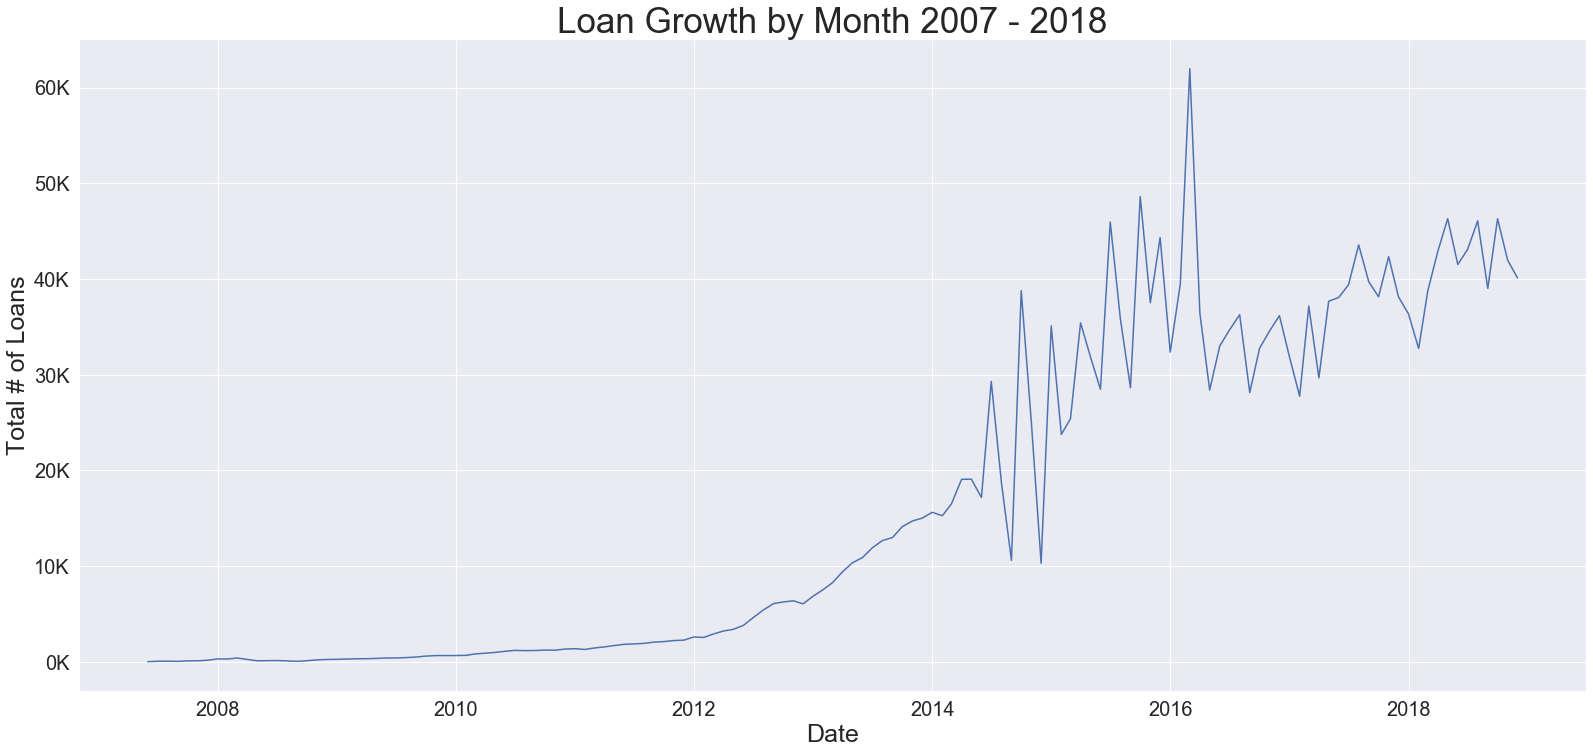

In [59]:
sns.set(rc={'figure.figsize':(27,12)})
ax = sns.lineplot(x="issuance_date", y="loan_amnt",data=acpByYear)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
#ax.set(xlabel='Date', ylabel = 'Total # Loans', title = "Loan Growth by Month 2007 - 2017")
ax.axes.set_title("Loan Growth by Month 2007 - 2018",fontsize=35)
ax.set_xlabel('Date',fontsize=25)
ax.set_ylabel('Total # of Loans',fontsize=25)
ax.set_yticklabels(ylabels)
ax.tick_params(labelsize=20)

In [84]:
acpUtil = acp.groupby(['sub_grade']).mean()[['all_util']].reset_index()

In [101]:
acpUtil2 = acp.groupby(['grade']).mean()[['all_util']].reset_index()

In [85]:
acpUtil.head()

,sub_grade,all_util
0,A1,41.044652
1,A2,42.410139
2,A3,45.202992
3,A4,47.438487
4,A5,50.727335


In [14]:
def plotGraph(style, x, y, dataFrame, xlabel, ylabel, tit, ylabUnit):
    sns.set(style = 'darkgrid')
    if style == 'bar':
        ax = sns.barplot(x=x, y = y, data = dataFrame)
    elif style == 'line':
        ax = sns.lineplot(x=x, y = y, data = dataFrame)
        
    ax.set_xticklabels(ax.get_xticklabels(),rotation=270)
    
    if ylabUnit == 'Pct':
        ylabels = ['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
    elif ylabUnit == 'Dollar':
        ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
    
    ax.axes.set_title(tit,fontsize=35)
    ax.set_xlabel(xlabel,fontsize=20)
    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_yticklabels(ylabels)
    ax.tick_params(labelsize=20)

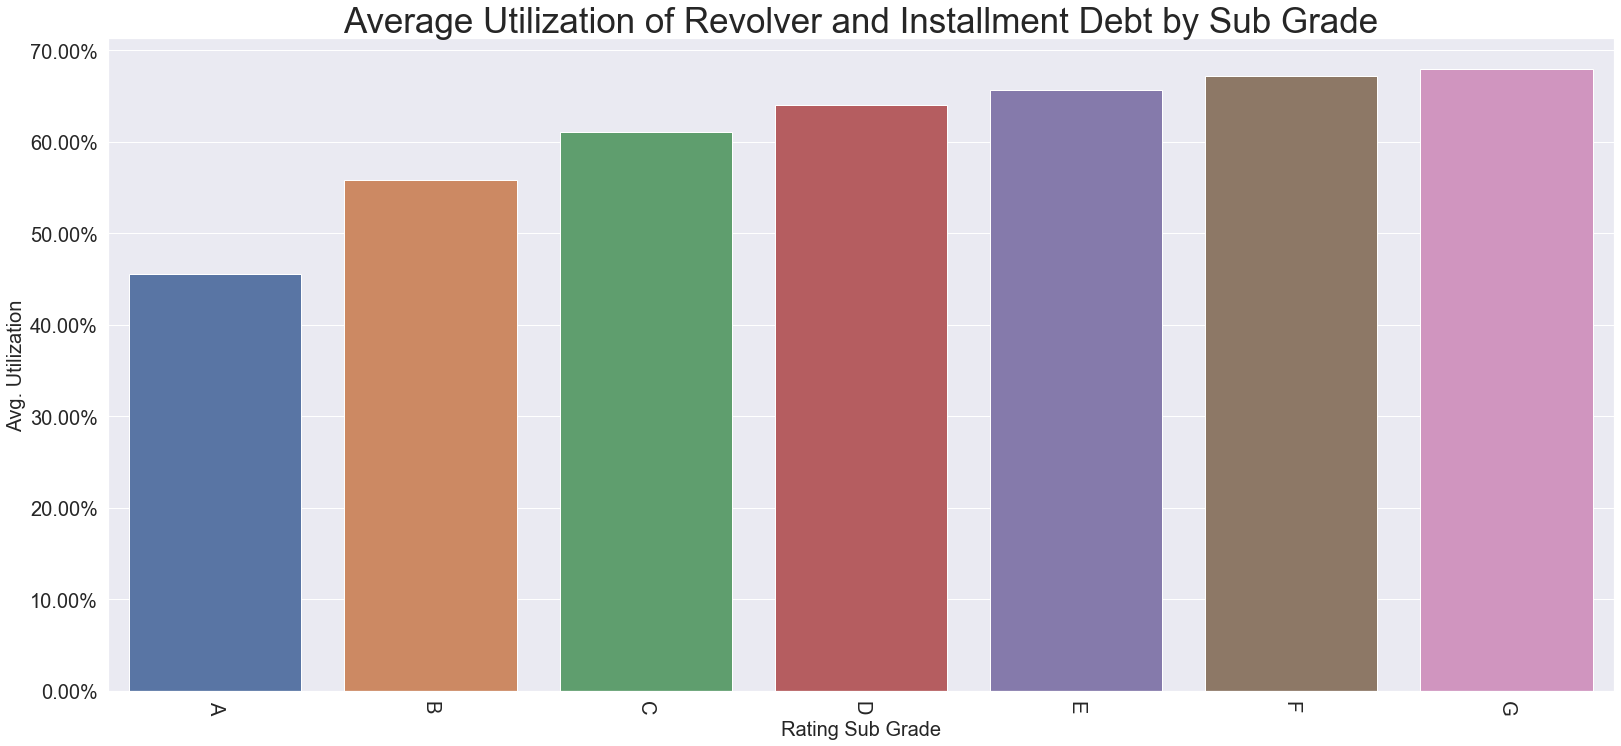

In [102]:
plotGraph('bar','grade','all_util',acpUtil2,'Rating Sub Grade','Avg. Utilization','Average Utilization of Revolver and Installment Debt by Sub Grade','Pct') 

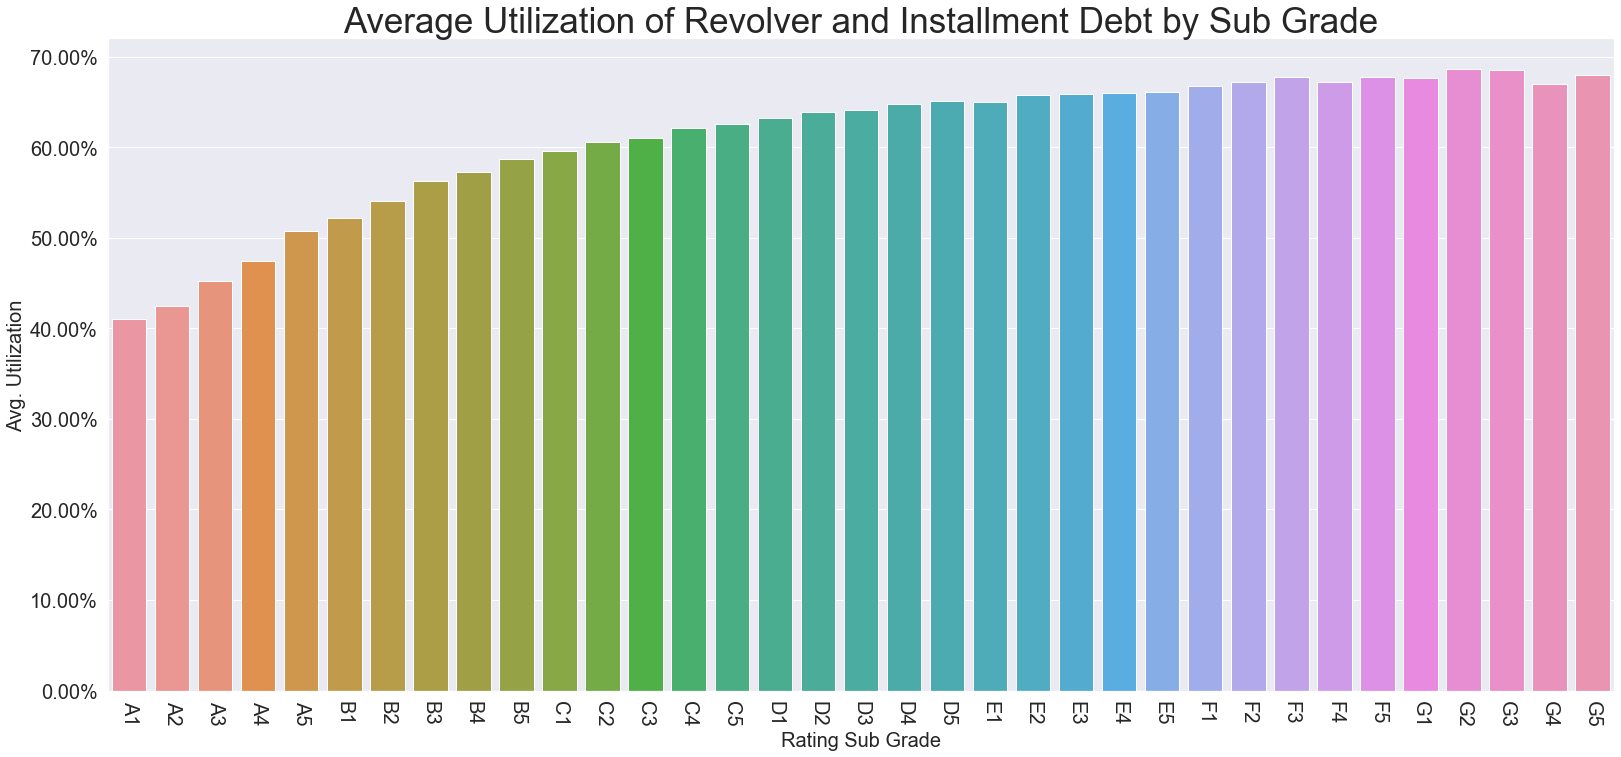

In [103]:
plotGraph('bar','sub_grade','all_util',acpUtil,'Rating Sub Grade','Avg. Utilization','Average Utilization of Revolver and Installment Debt by Sub Grade','Pct') 

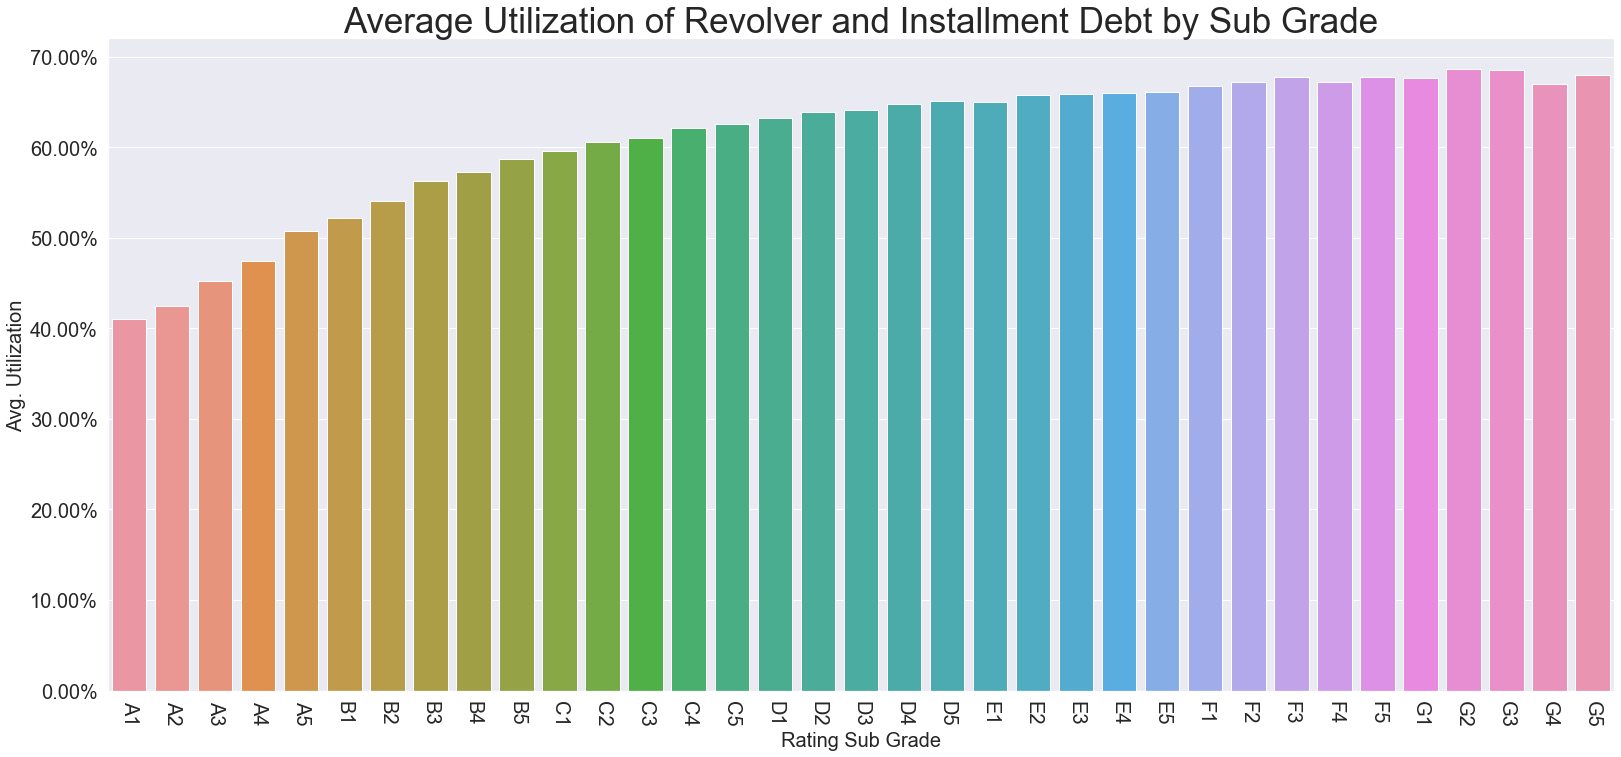

In [89]:
sns.set(style = 'darkgrid')
ax = sns.barplot(x='sub_grade', y = 'all_util', data = acpUtil)
ax.set_xticklabels(ax.get_xticklabels(),rotation=270)
ylabels = ['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
#ax.set(xlabel='Rating Sub Grade', ylabel = 'Avg. Utilization')
#ax.set_yticklabels(ylabels)
ax.axes.set_title(title,fontsize=35)
ax.set_xlabel('Rating Sub Grade',fontsize=20)
ax.set_ylabel('Avg. Utilization',fontsize=20)
#ax.set(xlabel='Rating Sub Grade', ylabel = 'Total # of Loans', fontsize = 20)
ax.set_yticklabels(ylabels)
ax.tick_params(labelsize=20)